In [46]:
# Setting the working directory
import os
os.chdir('/Users/ssg/Desktop/Python/data')

In [47]:
import sys
sys.path = ['/Users/ssg/Desktop/Python/packge'] + sys.path

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
# Import relevent dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tsfresh
import statsmodels

In [50]:
# Read the relevant Data series
import pandas as pd
base_series = pd.read_csv('CPI_series_Inflation.csv')

In [51]:
base_series.head()

,Year,CPI_combined,CPI_Headline_Inflation,Date_n
0,02-Jan,48.725055,5.585586,01/01/02
1,02-Feb,48.641907,5.595668,02/01/02
2,02-Mar,48.974501,5.745063,03/01/02
3,02-Apr,49.223947,5.525847,04/01/02
4,02-May,49.556541,5.486726,05/01/02


In [52]:
# Convert object date_n to datetime[64]
import pandas as pd
base_series['date']= pd.to_datetime(base_series['Date_n'])

In [53]:
base_series.head()

,Year,CPI_combined,CPI_Headline_Inflation,Date_n,date
0,02-Jan,48.725055,5.585586,01/01/02,2002-01-01
1,02-Feb,48.641907,5.595668,02/01/02,2002-02-01
2,02-Mar,48.974501,5.745063,03/01/02,2002-03-01
3,02-Apr,49.223947,5.525847,04/01/02,2002-04-01
4,02-May,49.556541,5.486726,05/01/02,2002-05-01


In [54]:
base_series.dtypes

Year                              object
CPI_combined                     float64
CPI_Headline_Inflation           float64
Date_n                            object
date                      datetime64[ns]
dtype: object

In [55]:
# Creating the series with only relevent information
base_series_new=base_series[['date','CPI_Headline_Inflation']]
base_series_new.reset_index(drop=True)
base_series_new.head()

,date,CPI_Headline_Inflation
0,2002-01-01,5.585586
1,2002-02-01,5.595668
2,2002-03-01,5.745063
3,2002-04-01,5.525847
4,2002-05-01,5.486726


In [56]:
# Let's check the data spread
print(base_series_new['date'].max())
print(base_series_new['date'].min())

2018-12-01 00:00:00
2002-01-01 00:00:00


In [57]:
# Check for Missing Values
base_series_new.isnull().sum()

date                      0
CPI_Headline_Inflation    0
dtype: int64

In [58]:
base_series = base_series_new.set_index('date')
base_series.index

DatetimeIndex(['2002-01-01', '2002-02-01', '2002-03-01', '2002-04-01',
               '2002-05-01', '2002-06-01', '2002-07-01', '2002-08-01',
               '2002-09-01', '2002-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='date', length=204, freq=None)

In [59]:
# Create the Series
y = base_series['CPI_Headline_Inflation'].resample('MS').mean()
y['2018':]

date
2018-01-01    5.065234
2018-02-01    4.441041
2018-03-01    4.278075
2018-04-01    4.576659
2018-05-01    4.870624
2018-06-01    4.924242
2018-07-01    4.172876
2018-08-01    3.692762
2018-09-01    3.772189
2018-10-01    3.379868
2018-11-01    2.325581
2018-12-01    2.186589
Freq: MS, Name: CPI_Headline_Inflation, dtype: float64

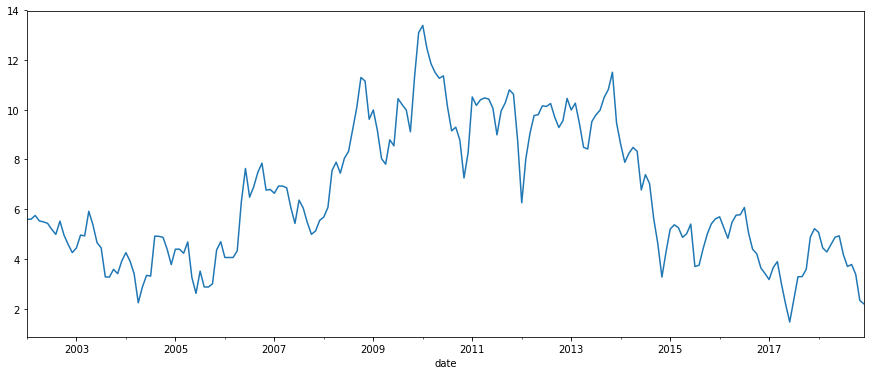

In [60]:
# Visualizing Inflation Time Series Data
y.plot(figsize=(15, 6))
plt.show()

# Alternative Visualization

In [63]:
# Please make sure you have installed the plotly and cufflinks for this type of Visualization.
# For Plotly you would require user name and API to access this chart
import plotly 
plotly.tools.set_credentials_file(username='*******', api_key='****')

In [66]:
import plotly.plotly as ply
import cufflinks as cf
base_series.iplot(title="CPI Inflation Data - 2002 to 2016")

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ssg.plabon/0 or inside your plot.ly account where it is named 'CPI Inflation Data - 2002 to 2016'


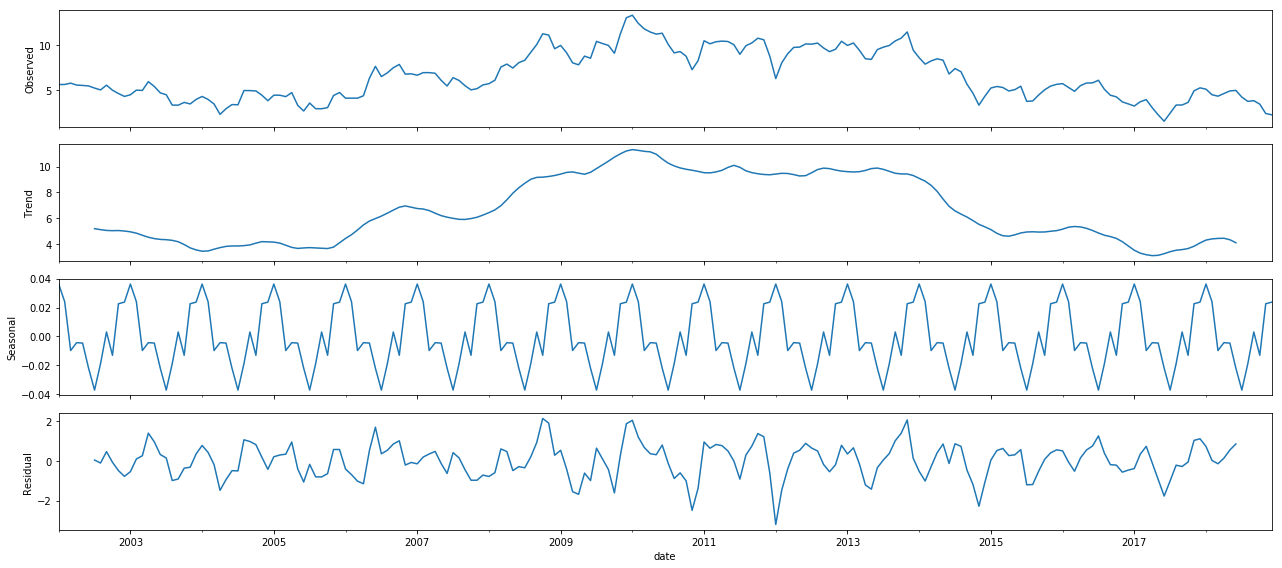

In [67]:
# Check for various component of the Time Series
import statsmodels as sm
from statsmodels.graphics import utils
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition_add = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition_add.plot()
plt.show()

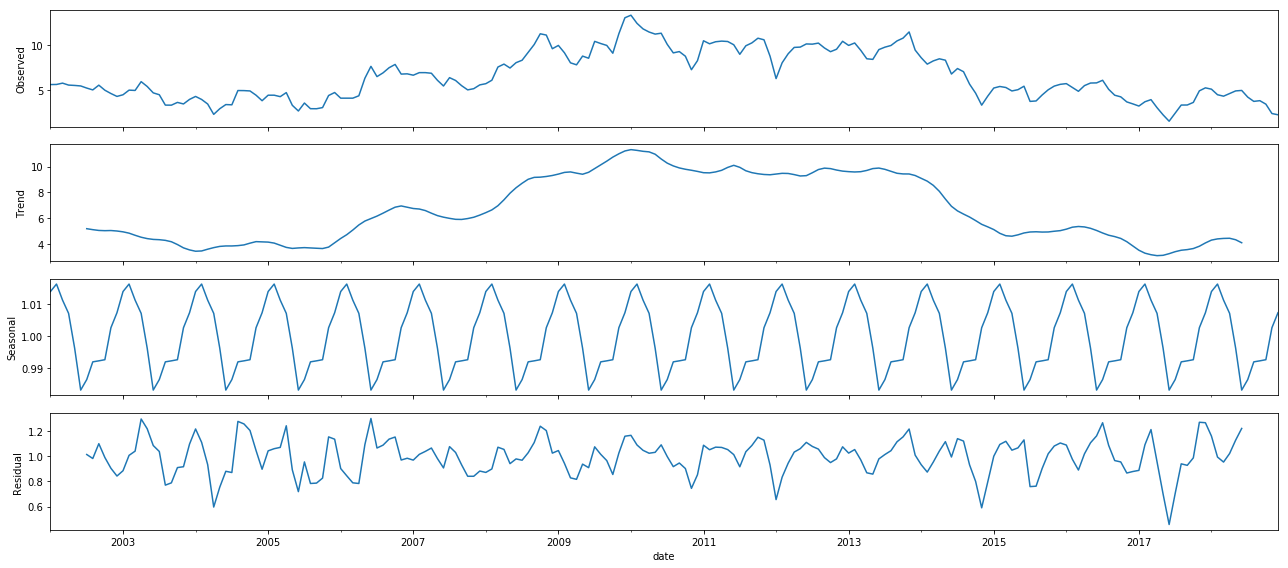

In [68]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition_mul = sm.tsa.seasonal_decompose(y, model='multiplicative')
fig = decomposition_mul.plot()
plt.show()

In [69]:
# A Quick check of stationarity
#Run ADF test on the original time series
from statsmodels.tsa import stattools
from statsmodels.tsa import seasonal
adf_result = stattools.adfuller(base_series['CPI_Headline_Inflation'], autolag='AIC')
print('p-val of the ADF test on irregular variations in CPI series data:', adf_result[1])

p-val of the ADF test on irregular variations in CPI series data: 0.8100920142967409


In [70]:
#Run ADF test on the irregular variations - Multiplicative Model
adf_result = stattools.adfuller(decomposition_add.resid[np.where(np.isfinite(decomposition_add.resid))[0]],
                                autolag='AIC')
print('p-val of the ADF test on irregular variations in CPI Data:', adf_result[1])

p-val of the ADF test on irregular variations in CPI Data: 3.333916863245594e-08


In [71]:
#Run ADF test on the irregular variations - Multiplicative Model
adf_result = stattools.adfuller(decomposition_mul.resid[np.where(np.isfinite(decomposition_mul.resid))[0]],
                                autolag='AIC')
print('p-val of the ADF test on irregular variations in CPI Data:', adf_result[1])

p-val of the ADF test on irregular variations in CPI Data: 7.405904805470883e-08


# Differencing - Basic check for Stationarity

In [72]:
# First Order Differencing
first_order_diff = base_series['CPI_Headline_Inflation'].diff(1)

Text(0.5, 1.0, 'First-order differences of CPI data - 2000 to 2018')

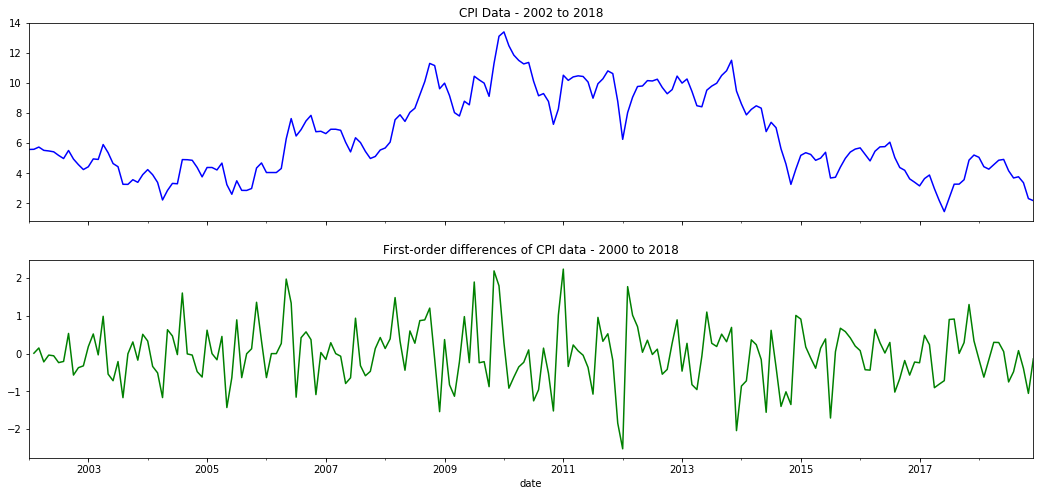

In [73]:
#Let us plot the original time series and first-differences
fig, ax = plt.subplots(2, sharex=True)
base_series['CPI_Headline_Inflation'].plot(ax=ax[0], color='b')
ax[0].set_title('CPI Data - 2002 to 2018')
first_order_diff.plot(ax=ax[1], color='g')
ax[1].set_title('First-order differences of CPI data - 2000 to 2018')

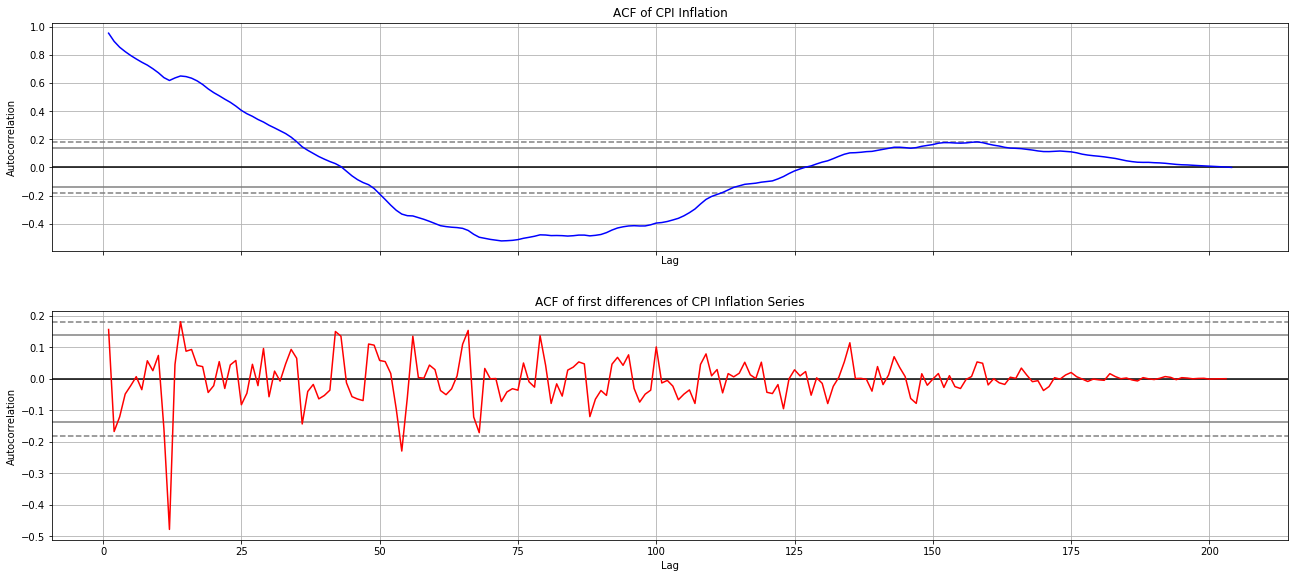

In [74]:
#Let us plot the ACFs of original time series and first-differences
from pandas.plotting import autocorrelation_plot
fig, ax = plt.subplots(2, sharex=True)
autocorrelation_plot(base_series['CPI_Headline_Inflation'], color='b', ax=ax[0])
ax[0].set_title('ACF of CPI Inflation')
autocorrelation_plot(first_order_diff.iloc[1:], color='r', ax=ax[1])
ax[1].set_title('ACF of first differences of CPI Inflation Series')
plt.tight_layout(pad=0.6, w_pad=0.6, h_pad=3.0)

Now we could perform the Ljung-Box test on the ACFs of the original time series and the first-differences.
For running the test we can limit upto specified Lags

# Building the ARIMA Model

In [75]:
base_series.index = pd.to_datetime(base_series.index)

In [76]:
base_series.columns = ['CPI_Headline_Inflation']

In [77]:
base_series.head()

,CPI_Headline_Inflation
date,
2002-01-01,5.585586
2002-02-01,5.595668
2002-03-01,5.745063
2002-04-01,5.525847
2002-05-01,5.486726


In [78]:
# We will be using pmdarima package
import pmdarima

In [79]:
# Grid-Search and Cross Validation 
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(base_series, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=661.615, BIC=668.120, Fit time=0.028 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=544.638, BIC=557.647, Fit time=0.291 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=659.689, BIC=669.446, Fit time=0.062 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=519.373, BIC=535.635, Fit time=0.689 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=446.103, BIC=465.617, Fit time=4.449 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=449.114, BIC=465.375, Fit time=2.164 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=443.949, BIC=466.715, Fit time=3.648 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(2, 1, 1, 12); AIC=445.1

In [80]:
stepwise_model.aic()

442.7277948999523

In [81]:
# Train-Test Split
train_cpi = base_series.loc['2002-01-01':'2018-06-01']
test_cpi = base_series.loc['2018-07-01':]

In [82]:
train_cpi.tail()

,CPI_Headline_Inflation
date,
2018-02-01,4.441041
2018-03-01,4.278075
2018-04-01,4.576659
2018-05-01,4.870624
2018-06-01,4.924242


In [83]:
test_cpi.head(6)

,CPI_Headline_Inflation
date,
2018-07-01,4.172876
2018-08-01,3.692762
2018-09-01,3.772189
2018-10-01,3.379868
2018-11-01,2.325581
2018-12-01,2.186589


In [84]:
# Fit the Model with the Train Data
stepwise_model.fit(train_cpi)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(2, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

In [85]:
# Generating Forecast
# Evaluation
future_forecast = stepwise_model.predict(n_periods=6)

In [86]:
future_forecast

array([4.25098445, 3.79713094, 3.82485348, 3.50871569, 2.799969  ,
       2.49050892])

In [87]:
# Compare the results
future_forecast = pd.DataFrame(future_forecast,index = test_cpi.index,columns=['Forecast'])
pd.concat([test_cpi,future_forecast],axis=1).iplot()

In [88]:
pd.concat([base_series,future_forecast],axis=1).iplot()

In [89]:
# Calculating MAPE for the last 6 Month's data
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [90]:
pred = pd.concat([test_cpi,future_forecast],axis=1)
mean_absolute_percentage_error(pred['CPI_Headline_Inflation'],pred['Forecast'])

7.367397985560238

In [91]:
pred.head()

,CPI_Headline_Inflation,Forecast
date,,
2018-07-01,4.172876,4.250984
2018-08-01,3.692762,3.797131
2018-09-01,3.772189,3.824853
2018-10-01,3.379868,3.508716
2018-11-01,2.325581,2.799969


In [92]:
# We can evaluate the model using statsmodels
import warnings
warnings.filterwarnings('ignore')

best_model=sm.tsa.statespace.SARIMAX(train_cpi, order=(3, 1, 1), 
                                    seasonal_order=(2, 1, 1, 12)).fit(disp=-1)
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:             CPI_Headline_Inflation   No. Observations:                  198
Model:             SARIMAX(3, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -210.138
Date:                            Tue, 19 Mar 2019   AIC                            436.275
Time:                                    16:06:38   BIC                            462.038
Sample:                                01-01-2002   HQIC                           446.716
                                     - 06-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6237      0.175     -3.567      0.000      -0.966      -0.281
ar.L2          0.0393      0.085   

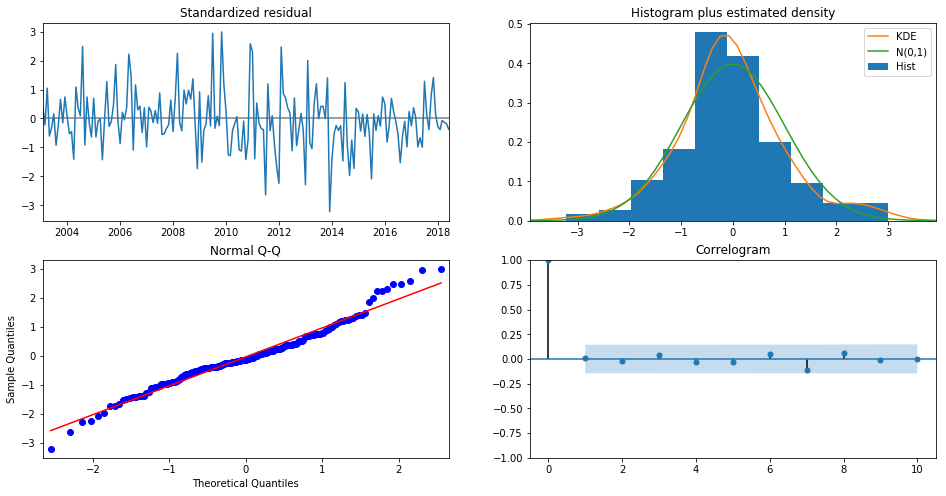

In [93]:
# Check the Model Diagnostics
best_model.plot_diagnostics(figsize=(16, 8))
plt.show()

# HW assignment - Holt Winter Exponential Smoothing method

In [94]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

A good choice of Time Series model for forecasting data with no clear trend or seasonal pattern. 
Forecasts are calculated using weighted averages, 
which means the largest weights are associated with most recent observations, while the smallest 
weights are associated with the oldest observations:

The weights decrease rate is controlled by the smoothing parameter α. If α is large (i.e., close to 1), more weight is given to the more recent observations. There are 2 extreme cases:

α=0: the forecasts of all future values are equal to the average (or “mean”) of the historical data, which is called Average method.
α=1: simply set all forecasts to be the value of the last observation, which is called Naive method..

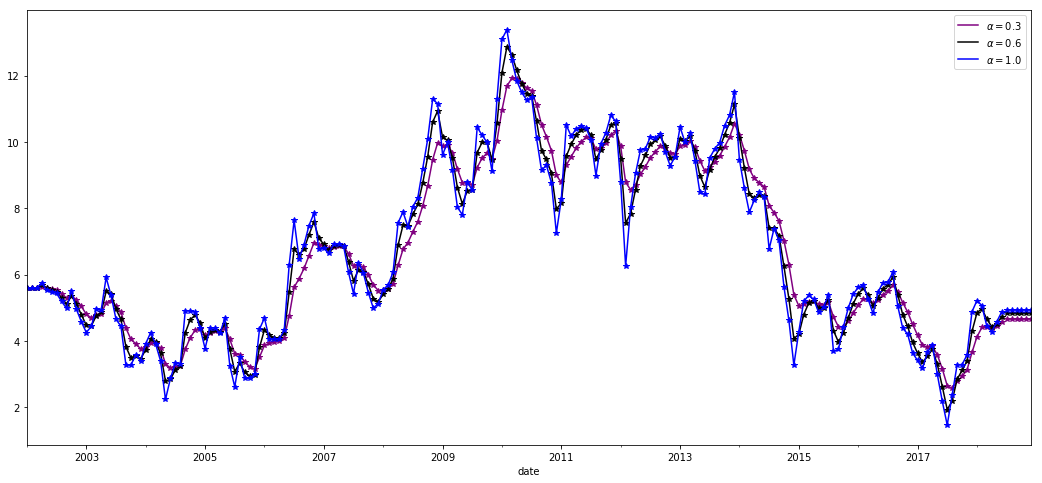

2018-07-01    4.673039
2018-08-01    4.673039
2018-09-01    4.673039
2018-10-01    4.673039
2018-11-01    4.673039
2018-12-01    4.673039
Freq: MS, Name: $\alpha=0.3$, dtype: float64
2018-07-01    4.8463
2018-08-01    4.8463
2018-09-01    4.8463
2018-10-01    4.8463
2018-11-01    4.8463
2018-12-01    4.8463
Freq: MS, Name: $\alpha=0.6$, dtype: float64
2018-07-01    4.924242
2018-08-01    4.924242
2018-09-01    4.924242
2018-10-01    4.924242
2018-11-01    4.924242
2018-12-01    4.924242
Freq: MS, Name: $\alpha=1.0$, dtype: float64


In [96]:
# Simple Exponential Smoothing
model_SES_1 = SimpleExpSmoothing(train_cpi).fit(smoothing_level=0.3,optimized=False)
pred_1 = model_SES_1.forecast(6).rename(r'$\alpha=0.3$')
# plot
pred_1.plot(marker='*', color='purple', legend=True)
model_SES_1.fittedvalues.plot(marker='*',  color='purple')



model_SES_2 = SimpleExpSmoothing(train_cpi).fit(smoothing_level=0.6,optimized=False)
pred_2 = model_SES_2.forecast(6).rename(r'$\alpha=0.6$')
# plot
pred_2.plot(marker='*', color='black', legend=True)
model_SES_2.fittedvalues.plot(marker='*', color='black')


model_SES_3 = SimpleExpSmoothing(train_cpi).fit(optimized=True)
pred_3 = model_SES_3.forecast(6).rename(r'$\alpha=%s$'%model_SES_3.model.params['smoothing_level'])
# plot
pred_3.plot(marker='*', color='blue', legend=True)
model_SES_3.fittedvalues.plot(marker='*', color='blue')

plt.show()

print(pred_1)
print(pred_2)
print(pred_3)

# Holt's Method
A logical extension of simple exponential smoothing (solution to data with no clear trend or seasonality).
Holt’s method involves a forecast equation and two smoothing equations (one for the level and one for the trend)

For long-term forecast, forecasting with 
Holt’s method will increase or decrease indefinitely into the future. In this case, we use the Damped trend method 

# Holt-Winters’ Method 
This method is suitable for data with trends and 
seasonalities which includes a seasonality smoothing parameter γ. There are two variations to this method:
"Additive Model" and "Multiplicative Model"

In model_HW_1, we use additive trend, additive seasonal of period season_length=6 and a Box-Cox transformation.
In model_HW_2, we use additive damped trend, additive seasonal of period season_length=6 and a Box-Cox transformation.

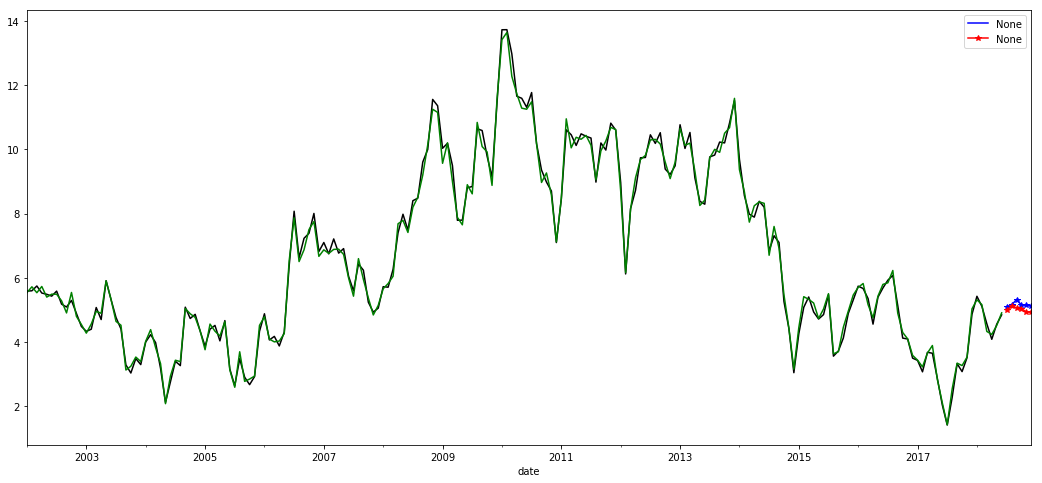

Forecasting : Holt-Winters method with additive Seasonality.
2018-07-01    5.104404
2018-08-01    5.147885
2018-09-01    5.323756
2018-10-01    5.149859
2018-11-01    5.146601
2018-12-01    5.125350
Freq: MS, dtype: float64
2018-07-01    4.992644
2018-08-01    5.112962
2018-09-01    5.068011
2018-10-01    5.035992
2018-11-01    4.934453
2018-12-01    4.931193
Freq: MS, dtype: float64


In [97]:
model_HW_1 = ExponentialSmoothing(train_cpi, seasonal_periods=6, trend='add', seasonal='add').fit(use_boxcox=True)
model_HW_2 = ExponentialSmoothing(train_cpi, seasonal_periods=6, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)

model_HW_1.fittedvalues.plot(style='-', color='black')
model_HW_2.fittedvalues.plot(style='-', color='green')

model_HW_1.forecast(6).plot(style='-', marker='*', color='blue', legend=True)
model_HW_2.forecast(6).plot(style='-', marker='*', color='red', legend=True)

plt.show()
print("Forecasting : Holt-Winters method with additive Seasonality.")

pred_hw_1 = model_HW_1.forecast(6)
pred_hw_2 = model_HW_2.forecast(6)

print(pred_hw_1)
print(pred_hw_2)